In [ ]:
# Import necessary libraries
import joblib
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from category_encoders import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted

In [ ]:
# ----------------------------------------------------------------------------------------------
# 1. Load the transformed data
# ----------------------------------------------------------------------------------------------

# Load the transformed data
df = pd.read_csv("../../data/processed/processed_melbourne_data.csv")

In [ ]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longitude,Regionname,Propertycount,Price_USD
0,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,776250.0
1,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,1098750.0
2,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,1200000.0
3,Abbotsford,124 Yarra St,3,h,1876000.0,S,Nelson,7/05/2016,2.5,3067.0,...,0.0,245.0,210.0,1910.0,Yarra City Council,-37.8024,144.9993,Northern Metropolitan,4019.0,1407000.0
4,Abbotsford,98 Charles St,2,h,1636000.0,S,Nelson,8/10/2016,2.5,3067.0,...,2.0,256.0,107.0,1890.0,Yarra City Council,-37.8060,144.9954,Northern Metropolitan,4019.0,1227000.0


In [ ]:
df.shape

(5969, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5969 entries, 0 to 5968
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         5969 non-null   object 
 1   Address        5969 non-null   object 
 2   Rooms          5969 non-null   int64  
 3   Type           5969 non-null   object 
 4   Price          5969 non-null   float64
 5   Method         5969 non-null   object 
 6   SellerG        5969 non-null   object 
 7   Date           5969 non-null   object 
 8   Distance       5969 non-null   float64
 9   Postcode       5969 non-null   float64
 10  Bedroom2       5969 non-null   float64
 11  Bathroom       5969 non-null   float64
 12  Car            5819 non-null   float64
 13  Landsize       5281 non-null   float64
 14  BuildingArea   5969 non-null   float64
 15  YearBuilt      5822 non-null   float64
 16  CouncilArea    5969 non-null   object 
 17  Latitude       5966 non-null   float64
 18  Longitud

In [ ]:
df["Suburb"].nunique()

314

In [ ]:
df["Suburb"].value_counts().head(30)

Suburb
Reservoir           123
Brunswick           113
Preston             101
Yarraville          100
Bentleigh East       99
Craigieburn          99
Coburg               97
Richmond             86
Northcote            82
Glenroy              81
Newport              77
Moonee Ponds         72
Werribee             63
Pascoe Vale          63
Ascot Vale           63
Thornbury            63
Footscray            60
Keilor East          60
Mill Park            59
Fawkner              59
Hoppers Crossing     59
Epping               57
Essendon             55
Sunshine West        55
Sunshine             50
Sunbury              48
Port Melbourne       47
Williamstown         47
West Footscray       46
Balwyn North         45
Name: count, dtype: int64

In [ ]:
# ----------------------------------------------------------------------------------------------
# 2. Split the data into feature matrix and target vector
# ----------------------------------------------------------------------------------------------

# Split the data into features and target
X = df[["Suburb"]]
y = df["Price_USD"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4775, 1), (1194, 1), (4775,), (1194,))

In [ ]:
# ----------------------------------------------------------------------------------------------
# 3. Build Model Baseline
# ----------------------------------------------------------------------------------------------

y_mean = y_train.mean()
y_mean

# Create a dumb model
y_pred_baseline = [y_mean] * len(y_train)
y_pred_baseline[:5]

[752859.1856544502,
 752859.1856544502,
 752859.1856544502,
 752859.1856544502,
 752859.1856544502]

In [ ]:
len(y_pred_baseline) == len(y_train)

True

In [ ]:
# ----------------------------------------------------------------------------------------------
# Calculate the baseline mean absolute error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean h price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))
"""
If an apartment 'Type' 'h' is always predicted at price $752,859.19
the the predictions would be off by an average of $241,499.33. It also means that
the model needs to have mean absolute error below $241,499.33 in order to be useful.
"""

Mean h price 752859.19
Baseline MAE: 241499.33


"\nIf an apartment 'Type' 'h' is always predicted at price $752,859.19\nthe the predictions would be off by an average of $241,499.33. It also means that\nthe model needs to have mean absolute error below $241,499.33 in order to be useful.\n"

In [ ]:
# ----------------------------------------------------------------------------------------------
# 4. Iterate on LinearRegression model and Ridge model
# ----------------------------------------------------------------------------------------------

# Instantiate the model
model_linear = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    LinearRegression()
    )

In [ ]:
model_ridge = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    Ridge()
)

In [ ]:
# Fit the model_linear
model_linear.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Suburb'], use_cat_names=True)),
                ('linearregression', LinearRegression())])

In [ ]:
# Fit the model_ridge
model_ridge.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Suburb'], use_cat_names=True)),
                ('ridge', Ridge())])

In [ ]:
# Check your that model is fitted
check_is_fitted(model_linear)
check_is_fitted(model_ridge)

In [ ]:
# ----------------------------------------------------------------------------------------------
# 6. Evaluate the model performance on the training sets
# ----------------------------------------------------------------------------------------------

# Make predictions on the two training sets
y_pred_training_linear = model_linear.predict(X_train)
y_pred_training_linear[:5]

array([ 597500.25      , 1020355.93220339, 1036875.        ,
        853650.        ,  843507.35294118])

In [ ]:
y_pred_training_ridge = model_ridge.predict(X_train)
y_pred_training_ridge[:5]

array([ 631790.21988596, 1015594.3354924 , 1013627.7022726 ,
        849811.61708206,  840397.43227268])

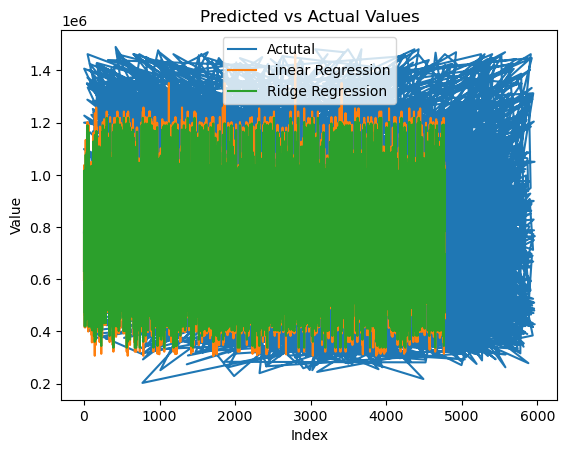

In [ ]:
# Visualise the models performance prediction against actual value
plt.plot(y_train, label="Actutal")
plt.plot(y_pred_training_linear, label="Linear Regression")
plt.plot(y_pred_training_ridge, label="Ridge Regression")
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Predicted vs Actual Values")
plt.legend()
plt.show();

In [ ]:
# Calculate the MAE for predictions in y_pred_training_log against the actual values in y_train
mae_training_linear = mean_absolute_error(y_train, y_pred_training_linear)
print("Training Linear MAE:", round(mae_training_linear, 2))

# Calculate the MAE for predictions in y_pred_training_Rg against the actual values in y_train
mae_training_ridge = mean_absolute_error(y_train, y_pred_training_ridge)
print("Training Ridge MAE:", round(mae_training_ridge, 2))

Training Linear MAE: 116273.57
Training Ridge MAE: 118801.17


In [ ]:
# ----------------------------------------------------------------------------------------------

"""
## Model Selection for Predicting `Price_USD` from `Suburb`

From the plot and training MAE, it is clear that both **Linear** and **Ridge Regression**  
are **not ideal** for this task. These models assume a continuous, linear relationship  
between `Suburb` and `Price_USD`, which is incorrect because `Suburb` is a **categorical** variable  
with **314 unique values**.

### **Issue with Numerical Encoding**
Even if `Suburb` is numerically encoded as I have done, the model will interpret these values  
as having an inherent order (e.g., `Suburb_A = 1, Suburb_B = 2`), which is **incorrect**  
because suburb names do not have a meaningful numerical relationship.

### **Why Regularization Won't Help**
Ridge Regression applies **L2 regularization** to reduce overfitting, but it does **not**  
solve the **core issue**: `Suburb` is categorical, not numerical.

### **Better Alternatives**
Instead of linear models, a tree-based model like:
- **Random Forest**
- **Gradient Boosting (XGBoost, CatBoost, LightGBM)**  

would be much better at handling categorical features like `Suburb`,  
as they can split on different suburbs without assuming a linear relationship.

"""
# Revert back to 'No. 4' and updte the model using 'Random Forest'

"\n## Model Selection for Predicting `Price_USD` from `Suburb`\n\nFrom the plot and training MAE, it is clear that both **Linear** and **Ridge Regression**  \nare **not ideal** for this task. These models assume a continuous, linear relationship  \nbetween `Suburb` and `Price_USD`, which is incorrect because `Suburb` is a **categorical** variable  \nwith **314 unique values**.\n\n### **Issue with Numerical Encoding**\nEven if `Suburb` is numerically encoded as I have done, the model will interpret these values  \nas having an inherent order (e.g., `Suburb_A = 1, Suburb_B = 2`), which is **incorrect**  \nbecause suburb names do not have a meaningful numerical relationship.\n\n### **Why Regularization Won't Help**\nRidge Regression applies **L2 regularization** to reduce overfitting, but it does **not**  \nsolve the **core issue**: `Suburb` is categorical, not numerical.\n\n### **Better Alternatives**\nInstead of linear models, a tree-based model like:\n- **Random Forest**\n- **Gradient 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Updated model using 'Random Forest'
model_rf = make_pipeline(
    OneHotEncoder(use_cat_names=True),
    RandomForestRegressor(n_estimators=100, random_state=42),
)

In [ ]:
# Fit the model_rf
model_rf.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Suburb'], use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [ ]:
# Check your that model is fitted
check_is_fitted(model_linear)
check_is_fitted(model_ridge)
check_is_fitted(model_rf)

In [ ]:
# Make predictions on the model_rf training sets
y_pred_training_rf = model_rf.predict(X_train)
y_pred_training_rf[:5]

array([ 589709.66653834, 1015932.86193684, 1046449.22357006,
        852100.36400083,  842238.03961079])

In [ ]:
# Calculate the MAE for predictions in y_pred_training_rf against the actual values in y_train
mae_training_rf = mean_absolute_error(y_train, y_pred_training_rf)
print("Training RandomForest MAE:", round(mae_training_rf, 2))

Training RandomForest MAE: 116625.43


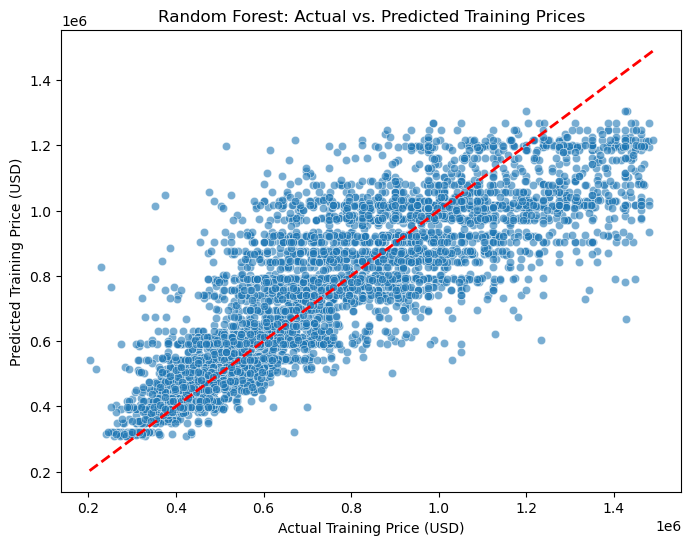

In [ ]:
# ----------------------------------------------------------------------------------------------
# RandomForest training model visualisation
# Scatter Plot: Actual training vs. Predicted training
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=y_train, y=y_pred_training_rf, alpha=0.6
)  # Alpha for better visibility
plt.plot(
    [y_train.min(), y_train.max()], [y_train.min(), y_train.max()], "r--", lw=2
)  # Diagonal Line (X and y coordinates for deal Predictions)
plt.xlabel("Actual Training Price (USD)")
plt.ylabel("Predicted Training Price (USD)")
plt.title("Random Forest: Actual vs. Predicted Training Prices")
plt.show();

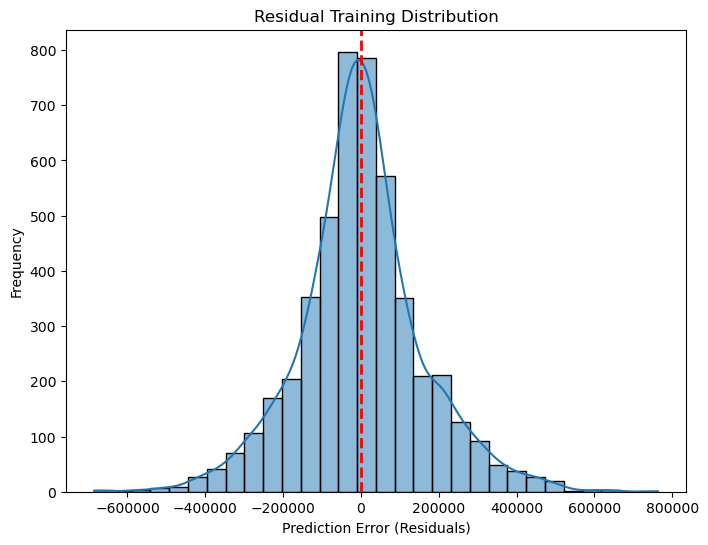

In [ ]:
# Residuals Histogram indicating where the residuals are zero (perfect predictions)
residuals = y_train - y_pred_training_rf
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(0, color="r", linestyle="--", linewidth=2)  # Adds a red dashed vertical line
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Training Distribution")
plt.show();

In [ ]:
# ----------------------------------------------------------------------------------------------
# 6. Creat a function to make predictions and evaluate the models performances on the test set
# ----------------------------------------------------------------------------------------------

def evaluate_models(models, X_test, y_test):
    """
    Evaluates multiple regression models on the test set.

    Parameters:
    models (dict): Dictionary of model names and trained model instances.
    X_test (array-like): Test set features.
    y_test (array-like): Actual target values.

    Returns:
    DataFrame: Evaluation metrics for each model.
    """
    # Placeholder to store results for each model
    results = []

    # Loop through each model to make predictions and evaluate
    for name, model in models.items():
        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the MAE for predictions against actual values in y_test
        mae = mean_absolute_error(y_test, y_pred)

        # Store results
        results.append({"Model": name, "MAE": mae})

    # Convert evaluation results into a DataFrame for better visualization
    return pd.DataFrame(results).sort_values(by="MAE")

In [ ]:
# ----------------------------------------------------------------------------------------------
# Use evaluate_models to make predication
# Define the models in a dictionary
models = {
    "Linear Regression": model_linear,
    "Ridge Regression": model_ridge,
    "Random Forest": model_rf,
}

In [ ]:
# Call the function and display results
evaluate_models(models, X_test, y_test)

,Model,MAE
2,Random Forest,118645.631501
0,Linear Regression,119662.505622
1,Ridge Regression,121196.237357


In [ ]:
# ----------------------------------------------------------------------------------------------
# 7.  Communicate the results
# ----------------------------------------------------------------------------------------------

# Get feature names from training data
feature_names = model_rf.named_steps["onehotencoder"].get_feature_names()
print("features len:", len(feature_names))
print(feature_names[:5])  # First five feature names

features len: 303
['Suburb_Kingsbury' 'Suburb_Northcote' 'Suburb_Balwyn'
 'Suburb_Templestowe Lower' 'Suburb_Kensington']


<ipython-input-150-3adf56a30cef>:6: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  feature_names = model_rf.named_steps["onehotencoder"].get_feature_names()


In [ ]:
# Extract the model importances parameters
importances = model_rf.named_steps[
    "randomforestregressor"
].feature_importances_
print(importances)

[1.04188031e-04 1.47591067e-02 6.07817090e-03 4.55103370e-03
 4.69451791e-03 3.23647264e-03 6.32822160e-03 4.59535960e-03
 8.00259635e-03 3.35323438e-02 6.08113495e-03 1.11875983e-03
 3.08544492e-03 3.60646392e-03 2.56672109e-03 7.53519271e-03
 8.42332099e-03 4.94461103e-04 5.79270760e-03 4.55602613e-03
 1.37511964e-04 9.17802595e-04 7.36679534e-04 8.06707666e-03
 8.77034798e-03 3.50059297e-03 5.22759976e-04 2.67684244e-03
 5.11828986e-03 4.33767427e-05 4.28585276e-03 6.75700729e-03
 2.50206341e-04 8.92701452e-03 2.55136652e-03 6.24423277e-03
 1.87419459e-02 2.16854660e-03 3.30569324e-04 1.11316376e-02
 2.53486308e-02 1.56948238e-04 7.57400680e-05 8.75200567e-03
 4.21192890e-04 3.97603965e-03 4.70536032e-04 1.04797910e-04
 1.75229435e-03 2.97477678e-04 2.77810639e-04 8.40378957e-05
 1.09154720e-02 9.04318046e-03 1.78482786e-03 6.49044983e-03
 1.10875970e-03 4.25981330e-03 2.69444055e-03 1.01987864e-03
 1.34810164e-02 1.20190726e-03 5.90016772e-03 1.55320736e-04
 3.17850172e-05 5.365280

In [ ]:
# Create a series with feature names and importances
feat_imp = pd.Series(importances, index=feature_names).sort_values()
print(feat_imp)

Suburb_New Gisborne        0.000002
Suburb_Springvale South    0.000003
Suburb_Emerald             0.000004
Suburb_Keilor Lodge        0.000004
Suburb_Healesville         0.000004
                             ...   
Suburb_Glen Iris           0.018146
Suburb_Hawthorn            0.018742
Suburb_Werribee            0.023263
Suburb_Balwyn North        0.025349
Suburb_Craigieburn         0.033532
Length: 303, dtype: float64


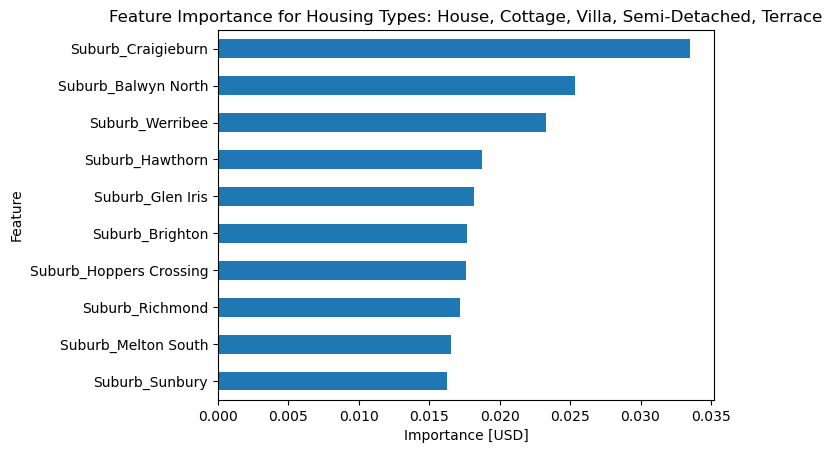

In [ ]:
# Plot 10 most important features
feat_imp.tail(10).plot(kind="barh")
plt.xlabel("Importance [USD]")
plt.ylabel("Feature")
plt.title(
    "Feature Importance for Housing Types: House, Cottage, Villa, Semi-Detached, Terrace"
);

In [ ]:
# ----------------------------------------------------------------------------------------------
# Extract the model_rf predictions for test performance visualisation
y_pred_rf = pd.Series(model_rf.predict(X_test))
y_pred_rf

0       9.877466e+05
1       1.022517e+06
2       5.026727e+05
3       1.013941e+06
4       8.706641e+05
            ...     
1189    8.422380e+05
1190    3.608218e+05
1191    5.764282e+05
1192    1.015933e+06
1193    7.644953e+05
Length: 1194, dtype: float64

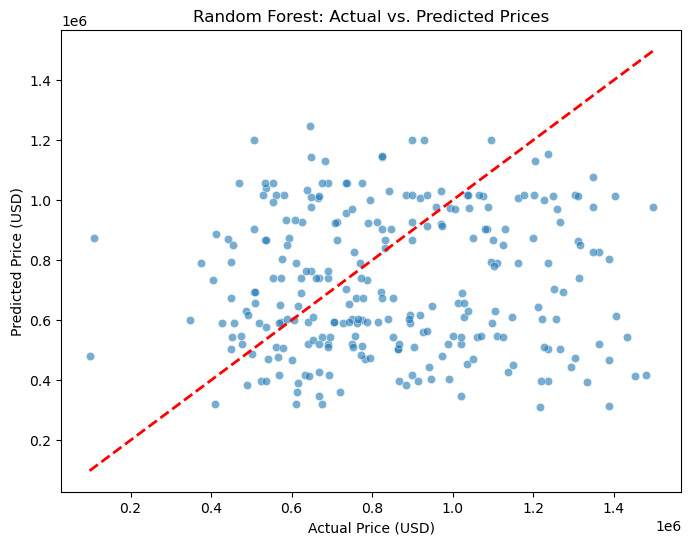

In [ ]:
# RandomForest final model visualisation
# Scatter Plot: Actual vs. Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)  # Alpha for better visibility
plt.plot(
    [y_test.min(), y_test.max()], [y_test.min(), y_test.max()], "r--", lw=2
)  # Diagonal Line (X and y coordinates for deal Predictions)
plt.xlabel("Actual Price (USD)")
plt.ylabel("Predicted Price (USD)")
plt.title("Random Forest: Actual vs. Predicted Prices")
plt.show();

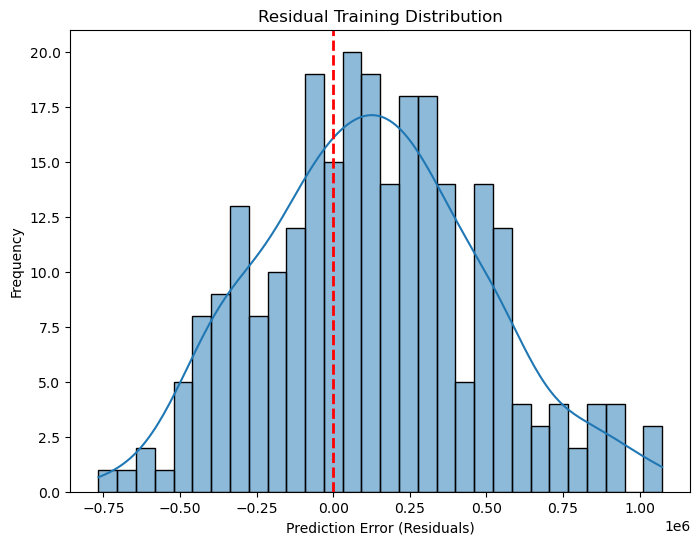

In [ ]:
# ----------------------------------------------------------------------------------------------

# Residuals Histogram indicating where the residuals are zero (perfect predictions)
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.axvline(
    0, color="r", linestyle="--", linewidth=2
)  # Adds a red dashed vertical line
plt.xlabel("Prediction Error (Residuals)")
plt.ylabel("Frequency")
plt.title("Residual Training Distribution")
plt.show();

In [ ]:
# ----------------------------------------------------------------------------------------------

# Check accuracy score of the actual vs the predicted model
acc_train = model_rf.score(X_train, y_train)
acc_test = model_rf.score(X_test, y_test)
acc_train

0.6991148638395573

In [ ]:
acc_test

0.6774324204269697

In [ ]:
"""
## Actual vs. Predicted Prices

This scatter plot compares the actual property prices with the prices predicted by the Random Forest model.

- The **red dashed diagonal line** represents perfect predictions: for any point on this line,
  the predicted price equals the actual price.
- The scatter of points around this line suggests that while some predictions closely match actual values,
  there is a notable degree of dispersion, particularly for higher prices. This indicates that while the model
  captures some trends in the data, it may not be fully accurate across all price ranges.

### Overall Insights
- Both visualizations indicate that the **Random Forest model** performs reasonably well, with residuals centered around zero.
- The scatter plot shows room for improvement, especially in predicting higher property prices,
  suggesting that further tuning or alternative modeling strategies could enhance performance.

### Follow-up Project
A follow-up project will aim to improve the model's accuracy by incorporating additional features
  such as **building area**, **location**, and **suburb**, with the goal of better predicting property prices.
"""

"\n## Actual vs. Predicted Prices\n\nThis scatter plot compares the actual property prices with the prices predicted by the Random Forest model.\n\n- The **red dashed diagonal line** represents perfect predictions: for any point on this line,\n  the predicted price equals the actual price.\n- The scatter of points around this line suggests that while some predictions closely match actual values,\n  there is a notable degree of dispersion, particularly for higher prices. This indicates that while the model\n  captures some trends in the data, it may not be fully accurate across all price ranges.\n\n### Overall Insights\n- Both visualizations indicate that the **Random Forest model** performs reasonably well, with residuals centered around zero.\n- The scatter plot shows room for improvement, especially in predicting higher property prices,\n  suggesting that further tuning or alternative modeling strategies could enhance performance.\n\n### Follow-up Project\nA follow-up project will ai

In [ ]:
# ----------------------------------------------------------------------------------------------
# 8. Save the model and Reload the model
# ----------------------------------------------------------------------------------------------

# Save the model to 'models' folder using joblib
joblib.dump(model_rf, "../../models/price_by_suburb_model.pkl")

['../../models/price_by_suburb_model.pkl']

In [ ]:
# Load the model from the 'models' folder
model = joblib.load("../../models/price_by_suburb_model.pkl")

# Check the model
model

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Suburb'], use_cat_names=True)),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])